# Physics 77, Lecture 1: Introduction to Unix and Python

## Welcome to Physics 77!  (Outline)

Introduction spiel:
* why this course
* goals of this course
* recommendations for how to approach this course
    * learning by doing!

*Learning goals for Physics 77*

The following learning goals will guide the presentation of material as well as development of HWs, rubrics for assessment, and practice problems for use in discussion section.

1. **Use of representations:** Students should be able to move fluidly between verbal descriptions, mathematical representations, visual graphs and tables, and computer code implementations of a physical situation.
1. **Communication:** Students should be able to justify and explain their reasoning, in oral and/or written form, at each step of solving a problem or writing code. Students should particularly be able to clearly and efficiently comment and document code. Students should also be able to communicate and collaborate effectively using state-of-the-art information technologies and appropriate presentational technologies (e.g., Camtasia, PowerPoint).
1. **Tools:** Students should be able to identify and apply appropriate Python libraries and programming techniques to manipulate data, approximate solutions to equations, implement algorithms for simulation, visualize results, and perform other tasks useful to physicists.
1. **Problem-solving:** Students should be able to adaptively identify and apply appropriate mathematical and computational tools and techniques to solve physical problems, model physical systems, and process data from simulations or experiments.
1. **Making connections:** Students should be able to use and relate new concepts and techniques with concepts and techniques developed in earlier courses in the series.
1. **Intellectual maturity and metacognition:** Students should take responsibility for their own learning, for example by identifying areas in which they need additional practice in the course and taking steps to obtain necessary help.
1. **Resourcefulness:** Students should be able to use technology to locate, access, evaluate, and use information, and appropriately cite resources from digital/electronic media.


## Introduction to Unix (Outline)

Commentary on usefulness of command line
* scripts!
* simple user interface
* quick editing
* remote access and navigation
* file permissions

You will learn and practice basic command line tools in the first workshop (?)

[some quick demonstrations]

## Introduction to Canopy (brief)

Walk through some basic canopy features, with example programs to do cool physics things as we go. (Otherwise interface walthrough is too dry and boring ...) Don't spend too long on this, as students will learn better hands-on in the workshop.

Important elements:
- editor
    - shell
    - active file
    - ipython notebooks
- tutorials!
- doc browser!



## Let's learn some python!

## To start: A graphing teaser

The material here is adapted from Chapter 0 in Eric Ayar's *Computational Physics With Python*

First we need to import a couple *libraries*: numpy and matplotlib. Libraries are collections of python functions that other people have written. We will frequently need these two libraries for doing physics.

In [1]:
print("Hello world")

Hello world


Let's write a formula:
$sinc(\alpha) = \sin(\alpha)/\alpha$
$\sqrt{\frac{\pi}{2}}$

In [2]:
from cmath import *

alpha = 3.1415/3.
sinc = sqrt(-alpha)/alpha
print(sinc)

0.9772194342603733j


In [3]:
# for mathematics and working with arrays
import numpy as np
# for plotting
import matplotlib.pyplot as plt 

# if a plot function doesn't show anything, run this and then the plot function again
%matplotlib inline

In [4]:
import math as m
import cmath as cm

x = cm.sqrt(-1)
print(x)

1j


Now let's pick some points to plot. We'll store the x-values in the variable `x` and the y-values in the variable `y`.

We store the values as arrays, which are a useful data type for math and plotting and working with large collections of numbers. Notice we use numpy to define the array (through it's nickname "np"), since arrays aren't built into python by default.

In [5]:
x = np.array([1,2,3,4,5,7])
y = x+4

Let's plot it! We need matplotlib.pyplot to do this, which we nicknamed "plt".

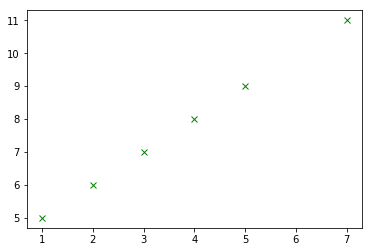

In [6]:
plt.plot(x,y,'gx')

You can give special commands to the IPython Notebook by using the `%` sign. This is NOT python code! It's special code just for the IPython interface.

In [7]:
# if a plot function doesn't show anything, run this and then the plot function again
%matplotlib inline

Matplotlib includes all sorts of functions to clean up and label plots. Let's try some of them:

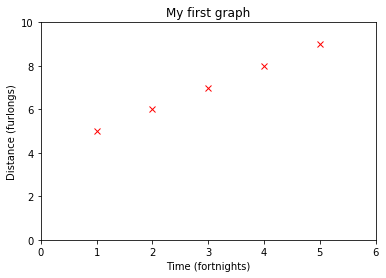

In [8]:
plt.plot(x,y,'rx')
plt.title('My first graph')
plt.xlabel('Time (fortnights)')
plt.ylabel('Distance (furlongs)')
plt.xlim(0, 6)
plt.ylim(0, 10);
plt.savefig("plot.png")

Let's build a fancier plot this time.

### New Title

let's describe the plot I am about to make

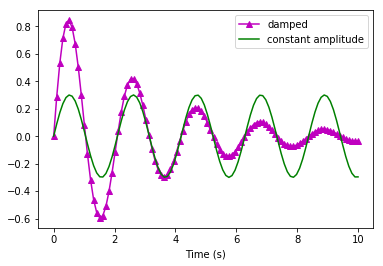

In [9]:
# this linspace function generates 100 values evenly spaced between 0.0 and 10.0
time = np.linspace(0.0, 10.0, 100)
# use exponential and sine functions from numpy to define the y-values (height) from the x-values (time)
height = np.exp(-time/3.0) * np.sin(time*3)
# plot time vs height, with magenta triangles for each point, connected by lines
plt.plot(time, height, 'm-^')
# on the same figure, plot time vs a sinusoid with constant height, and connect the points with green lines
plt.plot(time, 0.3*np.sin(time*3), 'g-')
# add a legend to label the different curves
plt.legend(['damped', 'constant amplitude'], loc='upper right')
# label the x-axis
plt.xlabel('Time (s)')

Python completely ignores any line that begins with `#`. These lines are called 'comments', and *they are a critical part of all of your code*. Notice how we sprinkled comments throughout that code, to make it easier to understand. Code without these comments ...

    time = np.linspace(0.0, 10.0, 100)
    height = np.exp(-time/3.0) * np.sin(time*3)
    plt.plot(time, height, 'm-^')
    plt.plot(time, 0.3*np.sin(time*3), 'g-')
    plt.legend(['damped', 'constant amplitude'], loc='upper right')
    plt.xlabel('Time (s)')
    
... still does exactly the same thing, but if you're new to numpy/matplotlib and didn't write it---or if you wrote it three hours ago and forgot---it might be hard to understand what each part is doing, or what the programmer was thinking at the time.

Descriptive variable names (like `time` and `height`) and comments are critical for understanding, reusing, and debugging code.

#### Importing and graphing real data

Suppose we have a text file with real data, and we want to graph it. We need to find the file, and then we need to import it into python. For convenience, we've already put the file in the same directory as this IPython notebook.

In [10]:
# pwd tells us which directory we're in (it's a Unix command that IPython understands)
%pwd

'/home/gbenato/Teaching/PHYSICS-88/sp19/Week01-02'

In [11]:
# ls tells us what's in the current directory (another Unix command)
%ls

Ba137.txt*         lec01/           microphones.txt*  Workshop01.ipynb
Homework01.ipynb*  Lecture01.ipynb  plot.png          Workshop01x.ipynb


Let's import this microphones.txt file, which contains three columns of numbers: frequencies, amplitudes of those frequencies from mic1, and amplitudes from mic2. We'll use numpy's `loadtxt` function, a powerful way to load files easily into arrays.

In [12]:
frequency, mic1, mic2 = np.loadtxt('microphones.txt', unpack = True)

In [13]:
print(mic1)
print(len(mic1))

[ 0.654  0.127  0.12  ...,  1.466  1.458  0.125]
2990


Now let's make a labeled plot, commenting our code for clarity:

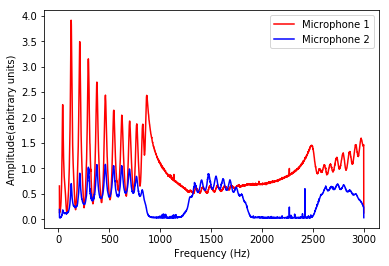

In [14]:
# start a new figure
plt.figure()
# plot frequency vs mic1 amplitude with a red curve, and
#      frequency vs mic2 amplitude with a blue curve
plt.plot(frequency, mic1, 'r-', frequency, mic2, 'b-')
# label the plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude(arbitrary units)')
plt.legend(['Microphone 1', 'Microphone 2'])

## Python basics (Outline)

then into Newman Chapter 1:
* arithmetic
* comments
* input
* print and string formatting
* variables
* data types (mention arrays)
* sequence indexing and slicing

Workshop: teaser plotting and practice with variables / data types / arithmetic / manipulating lists and strings

Homework: data types / arithmetic / manipulating lists and strings, emphasis on comments and good variable names

In [15]:
2+2 # addition

4

In [16]:
2*2 # multiplication

4

In [17]:
3%2  # modulus

1

In [18]:
7.//2  # floor division

3.0

In [19]:
10**2 # exponent

100

In [20]:
10*2 # multiplication

20

In [21]:
10^2 # warning: this is not a power operator, this is exclusive OR (bitwise operator)

8

### Assignments and variables

A "variable" is a handle to the data that you can name and manipulate. 
A very common concept in programming ! Actual implementation and propertied depend on the language. In Python, there are 3 basic vairable types: floats (real numbers), ints (discrete integers), and strings (sequences of characters)

In [22]:
import math as m

a = 1
b = +55
c = 20

x1 = (-b + m.sqrt(b**2 - 4*a*c))/(2*a)
print (x1)

x_2 = (-b - m.sqrt(b*b - 4*a*c))/(2*a)
print(x_2)

-0.3660728975697296
-54.63392710243027


In [23]:
x = 27.
print(type(x))


<class 'float'>


In [24]:
y = 5/2
print(y)
print(type(y))

2.5
<class 'float'>


In [25]:
str = 'Hello world'
print(type(str))

<class 'str'>


In [26]:
str = "Hello world"
print(type(str))

<class 'str'>


In [27]:
i = 0xfc
print(type(i))
print(i)

<class 'int'>
252


Can convert characters to int and vice versa

In [28]:
i = ord('z')
print(i)
c = chr(9)
print(c)

122
	


### Shorthands

In [29]:
x = 5
x = x + 6
x+=6
print(x)
y = 100.
y /= 10.
print(y)
i = 100
i -= 10
print(i)

17
10.0
90


In [30]:
i = 1
i++
print(i)

SyntaxError: invalid syntax (<ipython-input-30-69f17c40f8b9>, line 2)

### Integer vs Floating point types

In [ ]:
1./2  # Used to produce 0 in Python 2 ! 

In [ ]:
1//2 # this is how most computer languages would evaluate the expression above !

In [ ]:
1/2+(1./2)

In [ ]:
1./2

### Association rules, order of operations

In [31]:
(2+2)*2

8

In [32]:
(2+2)*2-1/2

7.5

### Comments

In [33]:
# this is a comment

In [34]:
x = 5 # assign 5 to a variable named "x"

'''

more comments

even more text

I am very verbose

x=7

'''

print(x)

5


more comments <b>bold text</b>

In [41]:
print('Hello world') # with a comment

i = 5

s = 'Hello'

s += ' world'.upper()
print(s)

Hello world
Hello WORLD


### Number of bytes and precision of data types

In [42]:
from decimal import Decimal
import sys

Let's determine the sizes of basic types

In [43]:
sys.getsizeof(int)  # huh ?

400

In [44]:
sys.getsizeof(int(2)) # more realistic. 8 bytes for the data, 16 bytes of overhead

28

In [45]:
sys.maxsize    # this is a 64-bit integer, because I am running a 64-bit version of Python

9223372036854775807

In [46]:
2**63-1  # check

9223372036854775807

Interesting thing about Python is that it would allocate more bytes for data if needed, so there is no practical limit to the integer value

In [47]:
2**65-1 

36893488147419103231

In [48]:
print(sys.getsizeof(2**65))
print(sys.int_info)

36
sys.int_info(bits_per_digit=30, sizeof_digit=4)


Floating point numbers:

In [49]:
sys.getsizeof(float(1.0))   # apparently, also 16 bytes

24

Largest representable float

In [50]:
1.7e+308

1.7e+308

In [51]:
5+7/180.+1.8e308/1.8e+308

nan

Smallest representable float

In [52]:
5e-324

5e-324

In [53]:
2e-324

0.0

#### Sizes of compusite data types (tuples, lists, arrays)

In [54]:
l = [1,2,4,5,6]
sys.getsizeof(l)

104

In [55]:
t = (1,2,4,5,6)
sys.getsizeof(t)

88

In [56]:
N=100000
a = np.zeros(N,dtype=np.int8)
#print(a)
print('size of a {0:d}-element array is {1:d} bytes, {2:3.1f} bytes/element'.format(N,sys.getsizeof(a),sys.getsizeof(a)/N))

size of a 100000-element array is 100096 bytes, 1.0 bytes/element


#### True representation of numbers

More info: <link>https://docs.python.org/2/tutorial/floatingpoint.html</link>

In [57]:
Decimal(1.0)

Decimal('1')

In [58]:
Decimal(1.1)

Decimal('1.100000000000000088817841970012523233890533447265625')

#### Beware of floating point comparisons !

In [59]:
1 == 1

True

In [60]:
1.1 == 11.0000000000000000001/10.

True

In [61]:
import numpy as np

In [62]:
np.pi

3.141592653589793

In [63]:
np.pi == 3.141592653589793238462643383279502884197169399

True

In [64]:
3.14159265358979 == 3.141592653589793

False

In general, the precision of the arithmetic comparisons (==) is not guaranteed. Behavior in Python may be very different from other languages, may depend on OS, compilers, etc. It is considered bad practice to use == comparisons on floating point data. Preferably, you should check if the difference between the two numbers is within a certain precision:

In [65]:
x = 3.1415926
abs(x-np.pi)<1e-6

True

### Formatted output

Usually the data you manipulate has finate precision. You do not know it absolutely precisely, and therefore you should not report it with an arbitrary number of digits. One of the cardinal rules of a good science paper: round off all your numbers to the precision you know them (or care about) -- and no more ! 

#### Examples:

In [66]:
x = 20.0 # I only know 3 digits
print(x)   # OK, let Python handle it

20.0


That's actually pretty good -- Python remembered stored precision !
What happens if you now use x in a calculation ? 

In [67]:
print(np.sqrt(x))

4.472135955


Do we really know the output to 10 significant digits ? No ! So let's truncate it

In [68]:
print('sqrt(x) = {0:6.3f}'.format(-np.sqrt(x)))

sqrt(x) = -4.472


Another (deprecated) way to skin this cat:

In [69]:
print('sqrt(x) = %5.2f' % np.sqrt(x))
print('sqrt(y) = %5.2f' % np.sqrt(101))

sqrt(x) =  4.47
sqrt(y) = 10.05


Print two numbers:

In [70]:
print ('sqrt(x) = {0:3.2e}, x**2 = {1:4.2f}'.format(np.sqrt(x),x**2))
print ('sqrt(x) = %3.2e, x**2 = %4.2f' % (np.sqrt(x), x**2))

sqrt(x) = 4.47e+00, x**2 = 400.00
sqrt(x) = 4.47e+00, x**2 = 400.00


Print with a different order:

In [71]:
print( '{0}{1}{0}'.format( 'abra', 'cad' ) )

abracadabra


Integer and hexadecimal formatting:

In [72]:
x = 251
print ('int(x) = %d' % x)
print ('hex(x) = 0x%x' % x)

int(x) = 251
hex(x) = 0xfb


For more formatting options, see https://pyformat.info/

### Complex numbers
Complex numbers and arithmetic are built into Python (very convenient). Mathematical functions are also provided for manipulating complex numbers. Math package defines real functions, cmath defines complex functions, scipy overloads them to return real values if the result of a calculation is a real number, complex otherwise 

In [ ]:
import math as m
import cmath as cm

print (cm.sqrt(-10))

In [ ]:
#from math import *
from cmath import *
#from scipy import *
z = 1 + 1j   # create a complex number
print(sqrt(z))

print(sqrt(-1))

In [ ]:
print (z.real, z.imag, abs(z))

In [ ]:
print (z*(1-1j))

In [ ]:
print (sqrt(4), sqrt(z), exp(z))

### Composite data types

Any computing language defines more complex data structures, which aggregate individual data into a single container. The simplest such data structure is an array, which holds a fixed number of elements of a single type, usually in a contiguous region in memory. 
Individual array elements can be indexed; first index in Python and other C-like languages is 0


In [ ]:
import numpy as np
a = np.array([1,2,3,4,5])
print (a[0],a[4])

In [ ]:
a[5]=10

In [ ]:
print (a[-1], a[-2])   # beware, very different in other languages !

In [ ]:
print(len(a))   # how long is an array ? 

In [ ]:
print(a)
b = np.append(a,10)
print(a)
print(b)

In [ ]:
print (np.append(a,111))    # append element to an array. Beware !- leaves original array intact, and returns a new array

In [ ]:
print (a)

In [ ]:
a = np.append(a,[6,7,8,9,10]) # if you want to change the original array
print (a)

Arrays can be multi-dimentional

In [ ]:
m = np.ndarray(shape=(3,3),dtype=float)  # unitialized array
print (m)

In [ ]:
m[0,:]=[1,2,3]
m[1,:]=[4,5,6]
m[2,:]=[7,8,9]
print (m)

In [ ]:
print (m[0,1]) # C-style, row-wise

In [ ]:
v = np.array([1,2,3])
print (m*v,"\n")            # probably not what you expected ?
print (np.matmul(m,v),"\n") # this is how we do linear algebra !
print (m*5)

In [ ]:
print (np.linalg.det(m))  # determinant -- do not compare directly to zero !

In [ ]:
abs(np.linalg.det(m)-1e-6)>0  # is matrix invertible ? 

In [ ]:
np.linalg.inv(m)  # run-time exception. Used to produce gibberish in Python 2.7, crashes in 3.6

In Python, the built-in data structure is actually a list, which is a bit more flexible than an array, but does not need to consist of elements of a single type. This can be convenient, but I generally consider this a risk. So if I were you, I would keep elements of a single type in a list. You can convert lists into Numpy arrays then. 

In [ ]:
mylist = [1,2,3,4,'foo','bar',5.8]
print(mylist)

In [ ]:
print (len(mylist))

In [ ]:
mylist.append(5)  # actually changes the list ! Compare to Numpy arrays. Congusing, huh ? 

In [ ]:
print(mylist)

In [ ]:
l = [1,2,3]
l.append([6,7]) # should append individual elements 6 and 7, right ?
print (l)           # woah, what happened ?
print (len(l))

In [ ]:
l.extend([8,9,10,11])    # this is what we really meant
print (l)

In [ ]:
len(l)

Differences between tuples and lists: tuples are not mutable !

In [ ]:
t = (1,2,3)
print(t)
t.append(5)

A more powerful structure is a dictionary (map, or hash table, or RB tree in some languages)

In [ ]:
age = {'Smith': 'Apple', 'Smith': 17}   # declare a dictionary with 2 elements. Types can be mixed
print (age['Smith'])
age['Smith'] = 45
print (age['Smith'])
age['Jones, Bill'] = 5
age['Baker, Street'] = 105
print (age['Jones'])
print (age['Jones, Bill'])
#print (age['Ivanov'])

income = {'Jones': 1}
print (income['Jones'])